<a href="https://colab.research.google.com/github/i-m-sankha16/Exploratory-Data-Analysis/blob/master/Coursera_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

In [3]:
df=pd.read_csv("/content/drive/My Drive/Coursera Dataset.csv")

In [4]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


**Checking if there are any missing values or not**

In [5]:
df.isnull().sum()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


**Using langdetect library to see what are available languages for courses**

In [7]:
pip install langdetect

     |████████████████████████████████| 983kB 3.4MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=42109bed07ef56218945d07b3b01ad5721d4424887358d1386a4fd3a538a3d04
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [8]:
import langdetect
df['Language']=df['course_title'].apply(lambda x: langdetect.detect(x))
df['Language'].value_counts()

en    718
es     46
fr     18
it     18
de     16
ru     14
ca      9
nl      8
da      7
ro      7
no      6
pt      6
tl      5
id      4
pl      2
af      2
bg      1
lt      1
hr      1
cy      1
hu      1
Name: Language, dtype: int64

In [9]:
df['Language'].value_counts().sum()

891

**Following steps are done for ease of analysis and aggregation**

In [10]:
df['Enrolled']=df['course_students_enrolled'].map(lambda x: str(x)[:-1])

In [11]:
df['Enrolled']=pd.to_numeric(df['Enrolled'])

In [12]:
df['Enrolled']=df['Enrolled']*1000

In [13]:
df["Enrolled"].describe()

count       891.000000
mean      81021.773288
std      108548.735793
min        1300.000000
25%       17000.000000
50%       42000.000000
75%       97500.000000
max      830000.000000
Name: Enrolled, dtype: float64

Pie Chart for various parameter Visualisation with importing plotly

In [14]:
import plotly.express as px

In [15]:
##import plotly.graph_objects as go

In [16]:
fig = px.pie(df,values='Enrolled',names='course_difficulty')

In [17]:
fig.show()

In [18]:
df1=df.head(100)

In [19]:
df1

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Language,Enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k,en,5300.0
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k,en,17000.0
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k,en,130000.0
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k,en,91000.0
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k,en,320000.0
...,...,...,...,...,...,...,...,...,...
95,143,Blockchain Revolution,INSEAD,SPECIALIZATION,4.7,Beginner,21k,en,21000.0
96,462,Blockchain Revolution in Financial Services,INSEAD,SPECIALIZATION,4.6,Beginner,1.6k,en,1600.0
97,719,Blockchain: Foundations and Use Cases,ConsenSys Academy,COURSE,4.7,Beginner,31k,en,31000.0
98,645,Boosting Creativity for Innovation,HEC Paris,COURSE,4.9,Beginner,9.5k,en,9500.0


**LETS EXPLORE THE DATA MORE BY PROPER VISUALIZATION**

*Proper Data-Viz helps to know more about the data corresponding to the certain parameters*

**Course_difficulty** *VS* **Enrolled** *VS* **Course_Rating** using Scatter 3d plot 

In [20]:
fig = px.scatter_3d(df1, x="course_difficulty", y="Enrolled", z="course_rating", color="course_difficulty",size="course_rating",symbol= "course_difficulty", hover_name="Enrolled",
                         color_discrete_map = {"Beginner": "green", "Intermediate": "#0FEB91", "Mixed":"yellow", "Advanced": "red"})
fig.show()      #3d scatterplot for the first 100 students

**Enrolled** *VS* **Course_difficulty** using Area plot

In [21]:
fig = px.area(df1, x="Enrolled", y="course_difficulty", color="course_rating", line_group="course_Certificate_type")  #the visualization shown for first 100 students
fig.show()

**Does more enrollment leads to better ratings?**

In [22]:
fig = px.scatter(df, x="course_rating", y="Enrolled", color="course_difficulty",
                 size='course_rating', hover_data=['Enrolled'])
fig.show()

**Course_difficulty** *VS* **Enrolled** *VS* **Language** using boxplot

In [23]:
fig = px.box(df, x="course_difficulty", y="Enrolled",color="Language")
#fig.update_traces(quartilemethod="exclusive")
fig.show()

Key observations from the above box plot:

*   Only few courses are advanced and most of the courses are in English language
*   English Courses have various **outliers** in every category of the course suggesting there are popular courses across different levels
*  In intermediate levels, Dutch(de) has very high no. of enrollments.





**Exploring Course_title using NLTK and Word Cloud**

In [24]:
import nltk
nltk.download('stopwords')
 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from wordcloud import WordCloud
df['course_title_new'] = df['course_title'].map(lambda x: x.split())
df['course_title_new']=df['course_title_new'].apply(lambda x: [item for item in x if item not in stop_words])
df['course_title_new']=df['course_title_new'].astype(str)

In [26]:
counting_title = ','.join(list(df['course_title_new'].values))

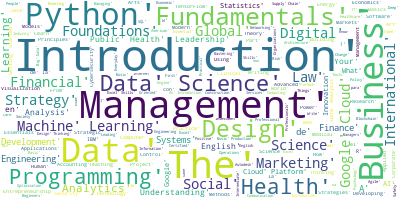

In [27]:
wordcloud = WordCloud(background_color="white", max_words=200, contour_width=3, contour_color='steelblue')
wordcloud.generate(counting_title)
wordcloud.to_image()

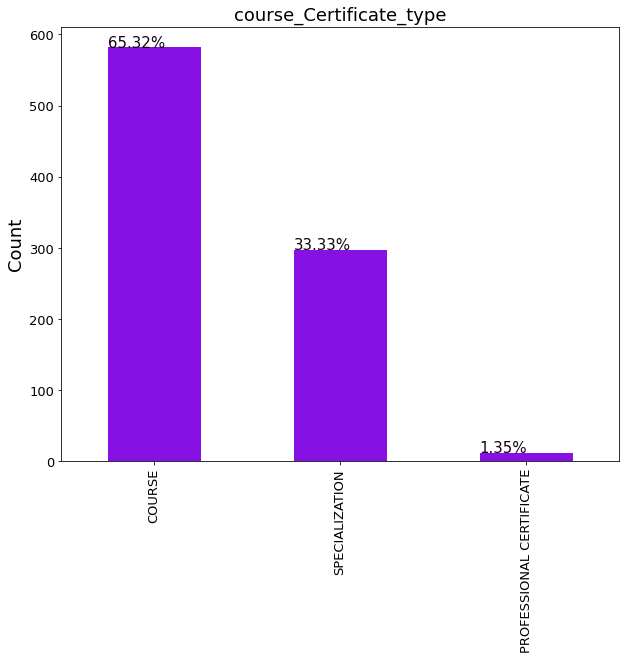

In [28]:
ab = df['course_Certificate_type'].value_counts().plot(kind='bar', figsize=(10,8),
                                        color="#8711E4", fontsize=13);
ab.set_alpha(0.8)
ab.set_title("course_Certificate_type", fontsize=18)
ab.set_ylabel("Count", fontsize=18);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ab.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ab.patches:
    # get_x pulls left or right; get_height pushes up or down
    ab.text(i.get_x(), i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#13010E')


**Exploring the courses on Machine Learning, Artificial Intelligence and Data Science using Regular Expression Library**

*Here we are searching the titles which provide the courses based on the above keywords and then we will see the names of the institutes*

In [29]:
import re
patterns=['AI','Artificial Intelligence','Machine Learning','Data Science','Analytics','Neural Networks','Random Forest','Natural Language Processing','NLP',
          'Deep Learning','Reinforcement Learning','Pattern Recognition','Feature Engineering','Kaggle','Data Visualization']
pattern_final = '|'.join(patterns)
def Clean_names(x):
    if re.search(pattern_final, x):
        return 1
    else: 
        return 0
df['ML_yes'] = df['course_title'].apply(Clean_names)

In [30]:
df['ML_yes'].sum()

84

In [31]:
university_ml=df.groupby(['course_organization'],as_index=False).ML_yes.sum()
university_ml.sort_values(by='ML_yes',ascending=False)

,course_organization,ML_yes
38,IBM,17
150,deeplearning.ai,13
34,Google Cloud,7
48,Johns Hopkins University,6
44,Imperial College London,4
...,...,...
47,JetBrains,0
46,Institute for the Future,0
45,Indian School of Business,0
43,Icahn School of Medicine at Mount Sinai,0


In [32]:
fig = px.strip(df, x="Enrolled", y="ML_yes", orientation="h", color="course_difficulty")
fig.show()

**Top Enrolled Courses in Coursera in Data Science / AI / Machine Learning**

In [33]:
data_science_df=df[df['ML_yes']==1]

In [34]:
import plotly.express as px
fig = px.bar(data_science_df, x="course_organization", y="Enrolled",color="Language")
fig.show()

So from the bar plot we can draw the information as **Johns Hopkins University** , **deeplearning.ai** , & **IBM** has *Most enrolled Courses* with respect to the Language they offer

*So finally comes the analysis of the **Ratings** based on which a particular individual comes up with the enrollment of the Courses*

**Ratings of only AI / ML / Data Science Courses**

In [35]:
import plotly.express as px
fig = px.box(data_science_df, x="course_organization", y="course_rating",color="course_difficulty")
#fig.update_traces(quartilemethod="exclusive")
fig.show()

In [36]:
import plotly.express as px
fig = px.bar(data_science_df, x="course_organization", y="Enrolled",color="course_difficulty")
fig.show()

**Top Rated course and specialization**

In [37]:
university_specialization=data_science_df.groupby(['course_organization','course_Certificate_type'],as_index=False).course_rating.mean()
university_specialization.sort_values(by='course_rating',ascending=False)

,course_organization,course_Certificate_type,course_rating
22,Stanford University,COURSE,4.900000
26,University of Amsterdam,COURSE,4.800000
24,University of Alberta,COURSE,4.800000
19,PwC,COURSE,4.800000
39,deeplearning.ai,COURSE,4.763636
40,deeplearning.ai,SPECIALIZATION,4.750000
15,MathWorks,SPECIALIZATION,4.700000
30,University of Illinois at Urbana-Champaign,COURSE,4.700000
25,University of Alberta,SPECIALIZATION,4.700000
23,Universidad Nacional Autónoma de México,COURSE,4.700000


This current pandemic forced us to remain indoors and motivated us to come up with new skills and depth of knowledge. Here, Coursera comes up with all these under same roof giving us the wonderful opportunity to boost our skills in this developing World and many renouned Institutes and Organisations (such as Google,Amazon,deeplearning.ai,Stanford University,John Hopkins University and many more) comes up with various specific courses and specializations.So basically our first experiences with this courses/specializations and organizations/institutes kickstarts here. I have analysed the data on the basis of course title, course organization, course rating,course difficulty and the no. of students enrolled. This data analysis will highlight the fact that how various Coursera Courses/Specializations from various Institutions and Organizations helped innumerous students in this pandemic with their good content as their individual ratings got reflected and helped more upcoming students to choose those courses more wisely. Some Exploratory Data Analysis (EDA) helped us to play with the data and come up with important conclusions, various plots and visualizations.

Hope it helps:)

Thank You